<a href="https://colab.research.google.com/github/IrfanPavel/Mobile_Customer_Churn/blob/main/Mobile_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Customer Churn**
In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn. Churn is where a customer leaves the mobile provider. The goal is to build a simple predictive model to predict churn from available features.

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus. The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).

The data is provided in file MobileCustomerChurn.csv and column headings are defined in a file MobileChurnDataDictionary.csv (store these in the files folder in your project).

 Your high level goal in this notebook is to try to build and evaluate a predictive model for churn - predict the value of the CHURN_IND field in the data from some of the other fields. Note that the three RECON fields should not be used as they indicate whether the customer reconnected after having churned

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [7]:
df=pd.read_csv("/content/MobileCustomerChurn.csv")

In [3]:
df

,INDEX,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
0,1,1,46,1,30,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24.0,SAMSUNG,1.0,61.40,COUNTRY,WA,NaN,NaN,NaN
1,2,2,60,3,55,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24.0,APPLE,1.0,54.54,METRO,NSW,NaN,NaN,NaN
2,3,5,65,1,29,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12.0,APPLE,1.0,2.50,COUNTRY,WA,NaN,NaN,NaN
3,4,6,31,1,51,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24.0,APPLE,1.0,6.48,COUNTRY,VIC,NaN,NaN,NaN
4,5,8,95,1,31,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24.0,APPLE,1.0,100.22,METRO,NSW,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,10423,22665,2,1,24,CONSUMER,2,40.90,BYO,2,0,0,NO-CONTRACT,0.0,APPLE,1.0,68.17,COUNTRY,VIC,NaN,NaN,NaN
10423,10424,22669,78,1,26,CONSUMER,78,54.54,NON BYO,24,0,24,OFF-CONTRACT,24.0,APPLE,1.0,69.98,METRO,NSW,NaN,NaN,NaN
10424,10425,22673,3,2,52,CONSUMER,3,36.36,NON BYO,3,21,24,ON-CONTRACT,0.0,SAMSUNG,1.0,208.76,METRO,VIC,NaN,NaN,NaN
10425,10426,22678,71,1,24,CONSUMER,71,53.63,NON BYO,50,0,24,OFF-CONTRACT,24.0,APPLE,1.0,9.10,COUNTRY,WA,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10427 entries, 0 to 10426
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   INDEX                         10427 non-null  int64  
 1   CUST_ID                       10427 non-null  int64  
 2   ACCOUNT_TENURE                10427 non-null  int64  
 3   ACCT_CNT_SERVICES             10427 non-null  int64  
 4   AGE                           10427 non-null  object 
 5   CFU                           10427 non-null  object 
 6   SERVICE_TENURE                10427 non-null  int64  
 7   PLAN_ACCESS_FEE               10427 non-null  float64
 8   BYO_PLAN_STATUS               10427 non-null  object 
 9   PLAN_TENURE                   10427 non-null  int64  
 10  MONTHS_OF_CONTRACT_REMAINING  10427 non-null  int64  
 11  LAST_FX_CONTRACT_DURATION     10427 non-null  int64  
 12  CONTRACT_STATUS               10427 non-null  object 
 13  P

In [8]:
#this cell works, but columns are removed already. I can run it once 
df=df.drop("RECON_SMS_NEXT_MTH", axis=1)
df=df.drop("RECON_TELE_NEXT_MTH", axis=1)
df=df.drop("RECON_EMAIL_NEXT_MTH", axis=1)
df=df.drop("INDEX", axis=1)
df=df.drop("CUST_ID", axis=1)

In [9]:
df

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
0,46,1,30,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
1,60,3,55,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
2,65,1,29,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
3,31,1,51,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
4,95,1,31,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,10,1,61,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC
46202,2,1,53,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW
46203,47,1,22,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW
46204,94,1,40,CONSUMER,182,17.27,NON BYO,4,0,24,OFF-CONTRACT,24,APPLE,0,17.27,METRO,VIC


In [10]:
df.shape

(46206, 17)

In [11]:
#Next step is splitting in x and y
X=df.drop("CHURN_IND", axis=1)
y=df["CHURN_IND"]

In [12]:
df.CHURN_IND.value_counts()

0    28416
1    17790
Name: CHURN_IND, dtype: int64

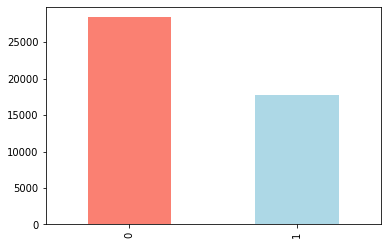

In [13]:
df.CHURN_IND.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
46201    0
46202    1
46203    0
46204    0
46205    0
Name: CHURN_IND, Length: 46206, dtype: int64

In [15]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
len(X), len(X_train)

(46206, 36964)

In [17]:
pd.crosstab(df.AGE, df.CHURN_IND)

CHURN_IND,0,1
AGE,,
#VALUE!,49,27
-4,1,1
104,1,0
105,1,1
109,2,0
...,...,...
92,2,4
93,3,2
94,2,0


In [18]:
pd.crosstab(df.CHURN_IND,df.AGE)

AGE,#VALUE!,-4,104,105,109,113,114,115,116,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,58,59,60,61,62,63,64,65,66,67,68,69,7,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,97
CHURN_IND,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49,1,1,1,2,0,1,18,16,1,124,2,156,345,426,504,581,629,681,721,697,675,620,614,653,596,637,609,592,557,540,522,557,546,597,615,608,627,639,616,...,450,424,400,347,342,340,283,293,267,248,222,204,1,184,137,125,112,89,88,75,69,55,50,47,27,34,23,21,6,16,10,8,8,9,2,2,3,2,1,1
1,27,1,0,1,0,1,0,7,11,1,54,1,212,418,502,506,518,565,565,579,549,531,531,467,443,409,416,421,378,364,370,340,342,327,350,358,327,372,358,373,...,205,186,166,149,183,137,117,135,117,130,101,85,0,69,84,66,42,48,27,29,29,34,21,9,16,9,12,8,20,8,7,8,1,4,5,4,2,0,2,0


In [19]:
df.isna().sum()

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            1
STATE                           1
dtype: int64

In [20]:
#for numeric 
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

ACCOUNT_TENURE
ACCT_CNT_SERVICES
SERVICE_TENURE
PLAN_ACCESS_FEE
PLAN_TENURE
MONTHS_OF_CONTRACT_REMAINING
LAST_FX_CONTRACT_DURATION
PREV_CONTRACT_DURATION
CHURN_IND
MONTHLY_SPEND


In [21]:
#for string
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

AGE
CFU
BYO_PLAN_STATUS
CONTRACT_STATUS
HANDSET_USED_BRAND
COUNTRY_METRO_REGION
STATE


In [22]:
#find how many nan in my numeric columns are
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [23]:
#now we are filling for the missing row which have "#VALUE!"

df.replace("#VALUE!",58,inplace=True)

In [31]:
#Converting strings into numbers 
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label+"_is_missing"]=pd.isnull(content)
    df[label]=pd.Categorical(content).codes+1

In [32]:
X=df.drop("CHURN_IND", axis=1)
y=df["CHURN_IND"]

In [33]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
#Applying models
models={"KNN":KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Linear SVC": LinearSVC()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)

    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [35]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'KNN': 0.7177017961480199,
 'Linear SVC': 0.6178316381735555,
 'Logistic Regression': 0.7172689893962346,
 'Random Forest': 0.762713698333694}

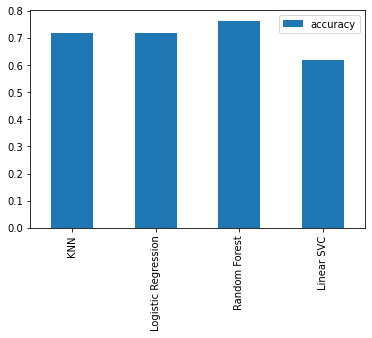

In [36]:
#Now my task is to do visualiazion
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# **Hyperparameter tuning and cross validation , Tuning by hand**

In [37]:
train_scores = []

test_scores = []

neighbors=range(1,21)

knn=KNeighborsClassifier()

#Loop Through different Neighbors values

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))

  test_scores.append(knn.score(X_test, y_test))


In [38]:
train_scores

[0.9996483064603398,
 0.8424954009306352,
 0.8414944270100638,
 0.8070284601233633,
 0.8076777405042744,
 0.7897143166323991,
 0.7912834108862677,
 0.7816794719186235,
 0.7833838329185153,
 0.7748349745698517,
 0.7744291743317823,
 0.7698842116654042,
 0.7702359052050644,
 0.7666107564116438,
 0.7676117303322151,
 0.7642571150308408,
 0.764825235364138,
 0.7613353533167406,
 0.7607672329834434,
 0.7596039389676442]

In [39]:
test_scores

[0.6875135252109933,
 0.706016013849816,
 0.710560484743562,
 0.718675611339537,
 0.7177017961480199,
 0.7225708721056049,
 0.7219216619779268,
 0.7258169227439948,
 0.7263579311837265,
 0.7251677126163169,
 0.7272235446872971,
 0.7267907379355117,
 0.7328500324605064,
 0.7271153429993508,
 0.72949578013417,
 0.7272235446872971,
 0.7285219649426531,
 0.7283055615667604,
 0.7264661328716728,
 0.7274399480631898]

maximum KNN Score on the test data set 73.28500324605064%


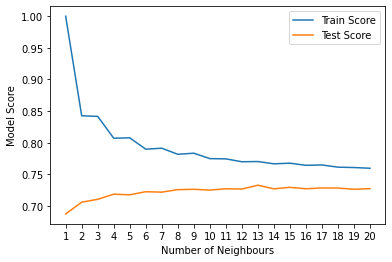

In [41]:
#Now we plot them to see the difference 

plt.plot(neighbors, train_scores,label="Train Score")
plt.plot(neighbors, test_scores,label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()
print("maximum KNN Score on the test data set {}%".format(max(test_scores)*100));

# **Tunining models with RandomizedSearch Cv**

In [42]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}


rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None, 3, 5, 10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1, 20,2)}

In [43]:
np.random.seed(42)
rs_log_ref=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_ref.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [44]:
rs_log_ref.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [45]:
rs_log_ref.score(X_test, y_test)

0.7258169227439948

In [46]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rs_rf.score(X_test, y_test)

# **Tuning A Model with GridSearchCv**

In [47]:
np.random.seed(42)

log_reg_grid={"C": np.logspace(-4, 4, 20),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [48]:
gs_log_reg.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(X_test, y_test)

0.7258169227439948

In [50]:
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3, 5, 10],
        "min_samples_split":np.arange(2, 20, 2),
        "min_samples_leaf":np.arange(1, 20, 2)}

np.random.seed(42)
gs_rf=GridSearchCV(RandomForestClassifier(),
                   param_grid=rf_grid,
                   cv=5,
                   verbose=True)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
gs_rf.best_params_

# **Evaluating a classification model, beyond Accuracy**

In [51]:
#Make Predictions on our test data 
y_preds=gs_log_reg.predict(X_test)

In [52]:
y_preds

array([0, 1, 1, ..., 0, 1, 0])

In [53]:

y_test

17815    0
11616    1
9562     1
12608    1
39527    1
        ..
7778     1
39381    0
26434    0
5134     1
22712    0
Name: CHURN_IND, Length: 9242, dtype: int64

# **ROC Curve and Auc Scores / AUC=Area Under Curve and ROC=Receiver Operating Characteristic**

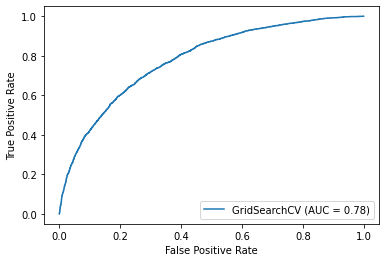

In [54]:
plot_roc_curve(gs_log_reg, X_test, y_test)

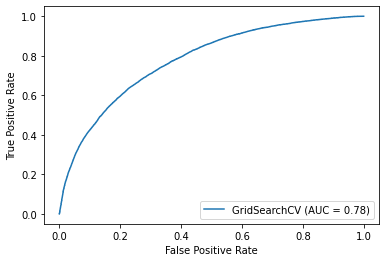

In [55]:
plot_roc_curve(gs_log_reg,X_train, y_train)

# **Confusion Matrix**

In [56]:
print(confusion_matrix(y_test, y_preds))

[[4731  956]
 [1578 1977]]


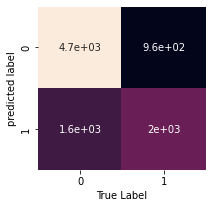

In [57]:
import seaborn as sns

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot=True,
                  cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

# **Classification Report**

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      5687
           1       0.67      0.56      0.61      3555

    accuracy                           0.73      9242
   macro avg       0.71      0.69      0.70      9242
weighted avg       0.72      0.73      0.72      9242



In [59]:
from sklearn.model_selection import cross_val_score
clf =  LogisticRegression(C=206.913808111479,
                          solver="liblinear")

In [60]:
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")

In [61]:
cv_acc=np.mean(cv_acc)

In [62]:
cv_acc

0.7231095340873488

In [63]:
cv_precision=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="precision")

In [64]:
cv_precision=np.mean(cv_precision)

In [65]:
cv_precision

0.6703451412826802

In [66]:
cv_recall=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="recall")

cv_recall=np.mean(cv_recall)

cv_recall

0.552557616638561

In [67]:
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)

cv_f1

0.6057367082238059

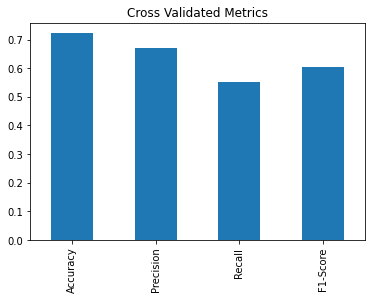

In [70]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1-Score": cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Metrics", legend=False);

# **Feature Importance**

In [71]:
clf.fit(X_train, y_train)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
clf.coef_

array([[-0.00589199, -0.00200644, -0.0160967 , -0.10773731, -0.00506618,
        -0.00756719,  0.59859536,  0.00674653, -0.09127791,  0.05992909,
        -0.98566911, -0.00957432,  0.06783404,  0.01141872, -0.3072427 ,
        -0.00385489,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00114563, -0.00114563]])

In [73]:
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))

In [74]:
feature_dict

{'ACCOUNT_TENURE': -0.005891988636529447,
 'ACCT_CNT_SERVICES': -0.0020064418464173723,
 'AGE': -0.016096702416720107,
 'AGE_is_missing': 0.0,
 'BYO_PLAN_STATUS': 0.598595362485675,
 'BYO_PLAN_STATUS_is_missing': 0.0,
 'CFU': -0.1077373084762396,
 'CFU_is_missing': 0.0,
 'CHURN_IND': 0.011418716009999256,
 'CONTRACT_STATUS': -0.9856691065004646,
 'CONTRACT_STATUS_is_missing': 0.0,
 'COUNTRY_METRO_REGION': -0.00385489170274878,
 'COUNTRY_METRO_REGION_is_missing': -0.0011456326376525453,
 'HANDSET_USED_BRAND': 0.06783404415915686,
 'HANDSET_USED_BRAND_is_missing': -0.0011456326376525453,
 'LAST_FX_CONTRACT_DURATION': 0.059929086785862506,
 'MONTHLY_SPEND': -0.30724270446832314,
 'MONTHS_OF_CONTRACT_REMAINING': -0.09127791051626959,
 'PLAN_ACCESS_FEE': -0.007567191511829838,
 'PLAN_TENURE': 0.00674653304501288,
 'PREV_CONTRACT_DURATION': -0.009574316176500168,
 'SERVICE_TENURE': -0.0050661798637852825,
 'STATE': 0.0}

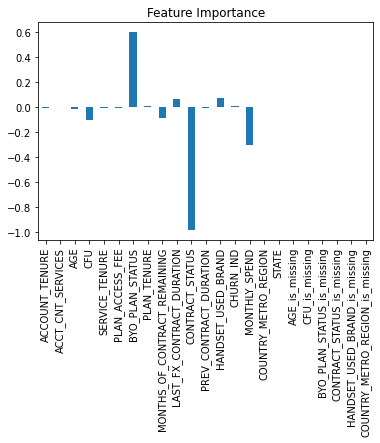

In [75]:
features_df=pd.DataFrame(feature_dict, index=[0])

features_df.T.plot.bar(title="Feature Importance", legend=False)